## Install Dependancies and Setup

In [1]:
!pip install tensorflow tensorflow opencv-python matplotlib

In [2]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
alabaster                     0.7.12
anaconda-client               1.11.0
anaconda-navigator            2.3.1
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
applaunchservices             0.3.0
appnope                       0.1.2
appscript                     1.1.2
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.11.7
astropy                       5.1
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcr

xlrd                          2.0.1
XlsxWriter                    3.0.3
xlwings                       0.27.15
yapf                          0.31.0
zict                          2.1.0
zipp                          3.15.0
zope.interface                5.4.0


In [3]:
import tensorflow as tf
import os

2023-05-25 14:32:19.594152: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
gpus = tf.config.experimental.list_physical_devices('CPU')

In [5]:
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [6]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

## Remove dodgy images

In [7]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [8]:
if os.path.isfile("Leg_Data/.DS_Store"):
    os.remove("Leg_Data/.DS_Store")

In [9]:
data_dir = 'Leg_Data'

In [10]:
image_exts = ['jpeg','jpg','bmp','png']

In [11]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

## Load Data

In [12]:
import numpy as np
from matplotlib import pyplot as plt  

In [13]:
Leg_Data = tf.keras.utils.image_dataset_from_directory('Leg_Data')

Found 60 files belonging to 2 classes.


2023-05-25 14:32:42.347682: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
data_iterator = Leg_Data.as_numpy_iterator()

In [15]:
batch = data_iterator.next()

In [16]:
batch[0].shape

(32, 256, 256, 3)

In [17]:
batch[1]

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1], dtype=int32)

In [18]:
batch

(array([[[[255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ],
          ...,
          [ 59.8125  , 105.375   , 122.6875  ],
          [ 59.960938, 104.83594 , 121.21094 ],
          [ 54.421875,  97.421875, 113.859375]],
 
         [[255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ],
          ...,
          [ 70.3125  , 118.3125  , 132.3125  ],
          [ 67.52344 , 115.578125, 124.05469 ],
          [ 57.90625 , 103.90625 , 118.90625 ]],
 
         [[255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ],
          ...,
          [ 59.867188, 107.86719 , 119.86719 ],
          [ 55.4375  , 102.6875  , 115.8125  ],
          [ 53.6875  ,  98.6875  , 119.3125  ]],
 
         ...,
 
         [[144.28125 , 148.28125 , 147.28125 ],
          [172.687

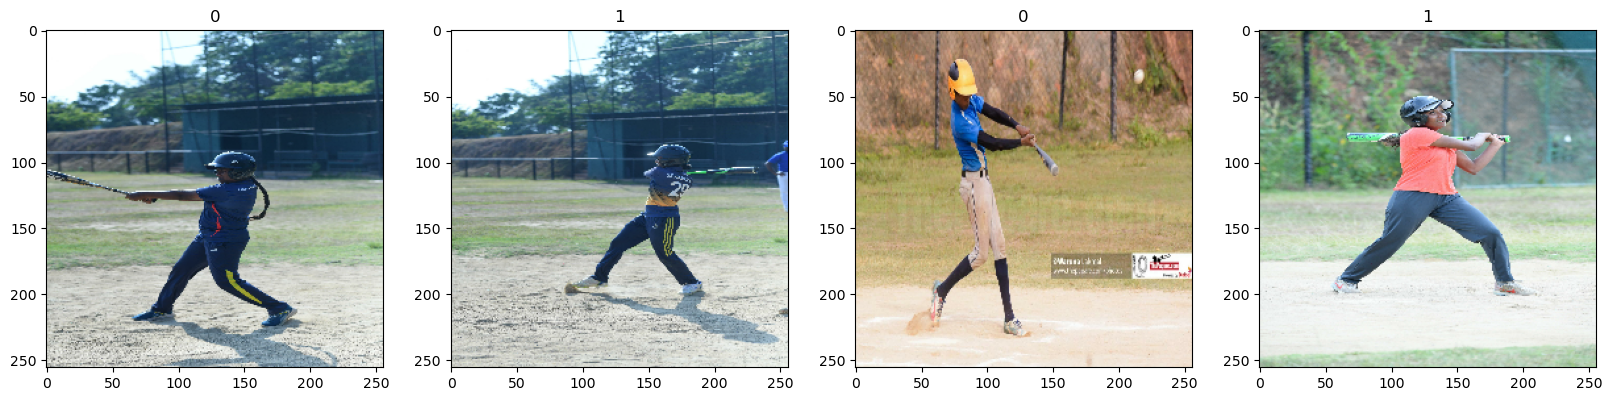

In [19]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
    
# 0 = Correct / 1 = Incorrect

## Preprocess Data

In [20]:
scaled = batch[0] / 255

In [21]:
scaled.max()

1.0

In [22]:
Leg_Data = Leg_Data.map(lambda x,y: (x/255, y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [23]:
scaled_iterator = Leg_Data.as_numpy_iterator()

In [24]:
batch = scaled_iterator.next()

In [25]:
batch[0].max()

1.0

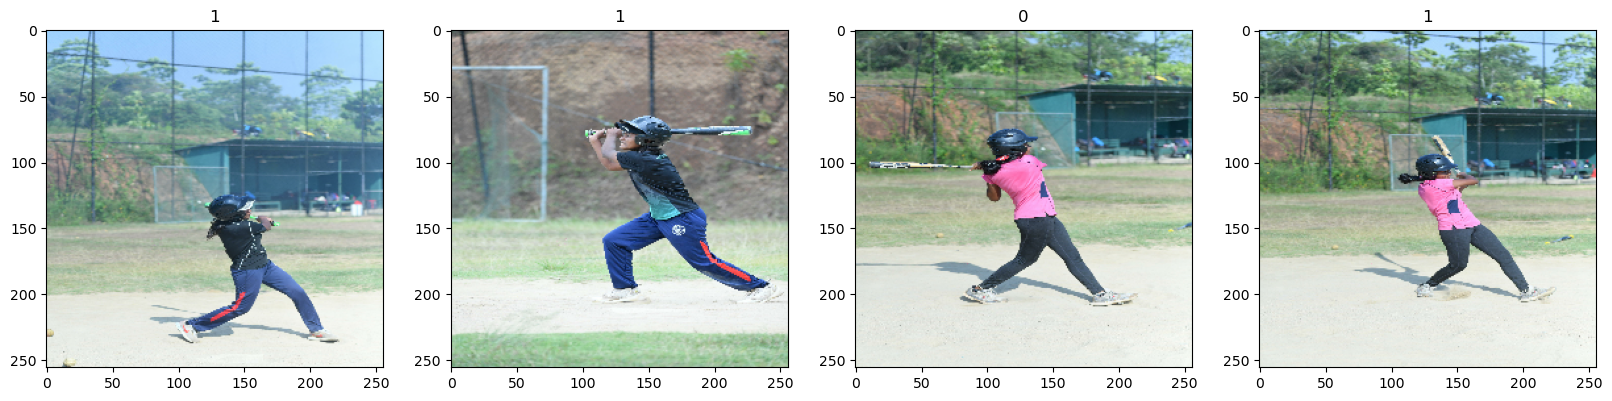

In [26]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

## Split Data

In [27]:
len(Leg_Data)

2

In [28]:
train_size = int(len(Leg_Data)*.7)
val_size = int(len(Leg_Data)*.2)
test_size = int(len(Leg_Data)*.1)+1

In [29]:
train_size+val_size+test_size

2

In [30]:
train = Leg_Data.take(train_size)
val = Leg_Data.skip(train_size).take(val_size)
test = Leg_Data.skip(train_size + val_size). take(test_size)

In [31]:
len(train)

1

## Build Deep Learning Model

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [33]:
model = Sequential()

In [34]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [35]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

## Train

In [37]:
logdir='logs'

In [38]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [39]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
1/1 [==============================] - 6s 6s/step - loss: 0.6874 - accuracy: 0.5938
Epoch 2/20
1/1 [==============================] - 4s 4s/step - loss: 4.0105 - accuracy: 0.4688
Epoch 3/20
1/1 [==============================] - 4s 4s/step - loss: 0.6347 - accuracy: 0.7812
Epoch 4/20
1/1 [==============================] - 4s 4s/step - loss: 1.0667 - accuracy: 0.3750
Epoch 5/20
1/1 [==============================] - 4s 4s/step - loss: 0.7887 - accuracy: 0.4375
Epoch 6/20
1/1 [==============================] - 4s 4s/step - loss: 0.6953 - accuracy: 0.4062
Epoch 7/20
1/1 [==============================] - 4s 4s/step - loss: 0.6558 - accuracy: 0.6250
Epoch 8/20
1/1 [==============================] - 4s 4s/step - loss: 0.6470 - accuracy: 0.6562
Epoch 9/20
1/1 [==============================] - 4s 4s/step - loss: 0.6315 - accuracy: 0.6562
Epoch 10/20
1/1 [==============================] - 4s 4s/step - loss: 0.6593 - accuracy: 0.5938
Epoch 11/20
1/1 [==============================] 

## Plot Performane

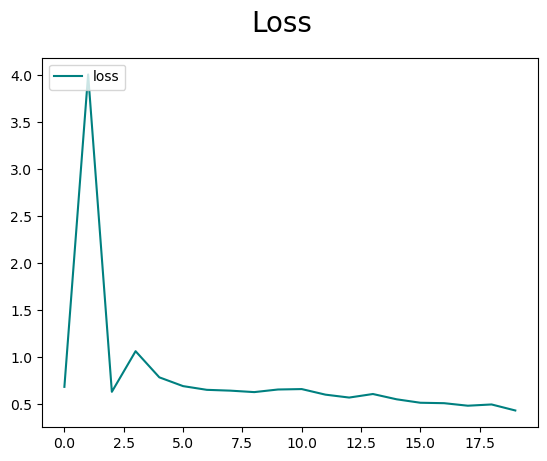

In [51]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
# plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

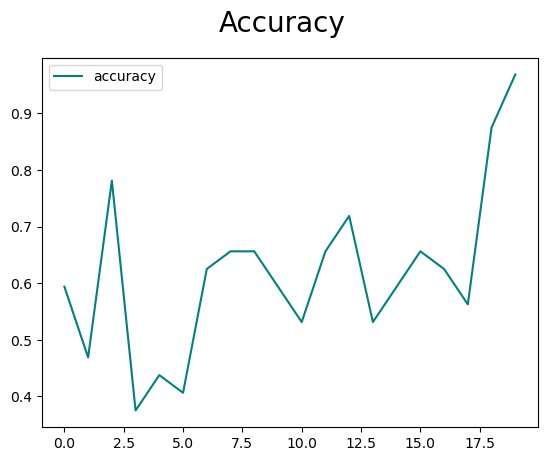

In [52]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
# plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [42]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [43]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [44]:
len(test)
## Result should be 1 - Not Sure

1

In [45]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 485ms/step


In [46]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')
## Results should be in between 0 - 1

Precision:1.0, Recall:0.8999999761581421, Accuracy:0.9642857313156128


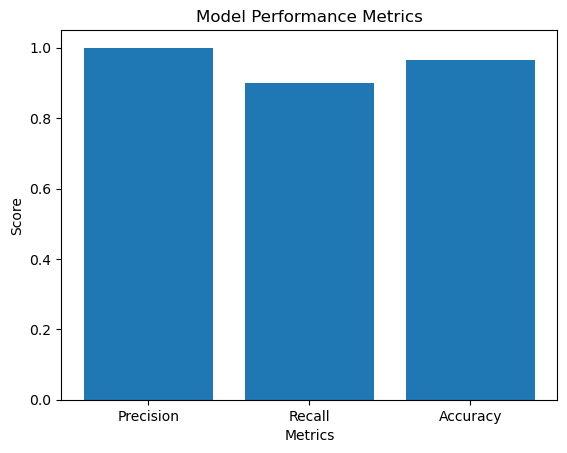

In [47]:
precision = pre.result().numpy()
recall = re.result().numpy()
accuracy = acc.result().numpy()

# Create a bar chart
fig, ax = plt.subplots()
ax.bar(['Precision', 'Recall', 'Accuracy'], [precision, recall, accuracy])

# Add labels to the chart
ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_title('Model Performance Metrics')

# Display the chart
plt.show()

In [54]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.9, shape=(), dtype=float32) tf.Tensor(0.96428573, shape=(), dtype=float32)


## Test

In [55]:
import cv2

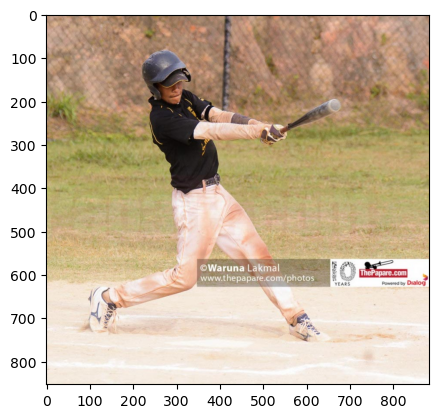

In [56]:
img = cv2.imread('leg.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

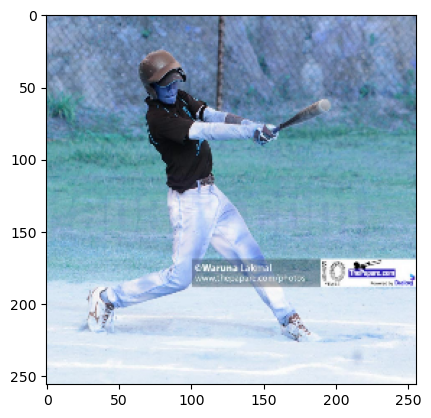

In [57]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [58]:
np.expand_dims(resize, 0)

array([[[[137.7271  , 168.20331 , 202.10175 ],
         [140.64877 , 166.64877 , 206.64877 ],
         [130.62183 , 156.74487 , 192.49878 ],
         ...,
         [121.07031 , 135.82422 , 168.70117 ],
         [109.593216, 129.24556 , 161.91939 ],
         [ 95.44478 , 121.384766, 149.44478 ]],

        [[136.12056 , 163.89595 , 198.56978 ],
         [131.64937 , 157.64937 , 197.64937 ],
         [123.9319  , 150.05495 , 185.80885 ],
         ...,
         [123.73828 , 140.49219 , 173.36914 ],
         [ 97.02276 , 118.34766 , 150.34766 ],
         [ 97.322266, 118.322266, 150.32227 ]],

        [[121.709885, 148.61703 , 183.29086 ],
         [123.33203 , 148.33203 , 188.33203 ],
         [135.51953 , 157.88028 , 193.73633 ],
         ...,
         [118.614784, 137.49173 , 170.24564 ],
         [ 99.740715, 122.740715, 154.74072 ],
         [109.421875, 128.00285 , 164.29012 ]],

        ...,

        [[223.26562 , 235.26562 , 245.26562 ],
         [222.16406 , 234.16406 , 244.16406 ]

In [59]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 238ms/step


In [60]:
yhat
## 0 - Correct | 1 = Incorrect

array([[0.39018968]], dtype=float32)

In [61]:
if yhat > 0.5:
    print(f'Predicted Class is INCORRECT')
else:
    print(f'Predicted Class is CORRECT')

Predicted Class is CORRECT


## Save the Model

In [62]:
import keras
from tensorflow.keras.models import load_model

In [63]:
model.save(os.path.join('leg_models','legClassifier.keras.h5'))

In [64]:
new_model = load_model(os.path.join('leg_models','legClassifier.keras.h5'))

In [65]:
new_model

In [66]:
# new_model.predict(np.expand_dims(resize/255, 0))

In [67]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 306ms/step


In [68]:
if yhatnew > 0.5:
    print(f'Predicted Class is INCORRECT')
else:
    print(f'Predicted Class is CORRECT')

Predicted Class is CORRECT


In [71]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import roc_curve, auc

# # Assuming that pre, re, acc, y_true, and y_pred are the precision, recall, accuracy, true labels, and predicted labels, respectively
# precision = pre.result().numpy()
# recall = re.result().numpy()
# accuracy = acc.result().numpy()

# # Calculate the ROC curve and AUC score
# fpr, tpr, thresholds = roc_curve(y, yhat)
# roc_auc = auc(fpr, tpr)

# # Create a bar chart
# fig, ax = plt.subplots()
# ax.bar(['Precision', 'Recall', 'Accuracy', 'AUC'], [precision, recall, accuracy, roc_auc])

# # Add the ROC curve to the plot
# ax.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
# ax.plot([0, 1], [0, 1], 'k--')
# ax.set_xlim([0.0, 1.0])
# ax.set_ylim([0.0, 1.05])
# ax.set_xlabel('False Positive Rate')
# ax.set_ylabel('True Positive Rate')
# ax.set_title('Model Performance Metrics and ROC Curve')
# ax.legend(loc="lower right")

# # Display the plot
# plt.show()